This is a Jupyter notebook. It's good for testing and running statistical experiments and graphs. You can run seperate chunks of code in these cells. This is where the stuff you are actually interested in will be performed

This first one will be about executing all the code that will get the date

From here you can do whatever you want, make comparisons, graphs, etc. This might help - https://matplotlib.org/stable/index.html

In [1]:
import os
os.chdir(r'C:\Users\adagan\PlayPython') # Replace with your folder location
from workflows.BaseballUniverseWorkflow import BaseballUniverseWorkflow

season2025DB =  BaseballUniverseWorkflow(
    season=2025,
    Players = []
)

#Does nothing right now because nothing is coded out
season2025DB.startWorkflow()



Found 30 MLB teams
Roster data saved to files/mlb_rosters_2025.csv
Created 840 BaseballPlayer objects
Found 18 Fridays/Sundays in 2025
2025-03-28 (Friday): 9 games
2025-03-30 (Sunday): 13 games
2025-04-04 (Friday): 14 games
2025-04-06 (Sunday): 16 games
2025-04-11 (Friday): 15 games
2025-04-13 (Sunday): 15 games
2025-04-18 (Friday): 15 games
2025-04-20 (Sunday): 16 games
2025-04-25 (Friday): 15 games
2025-04-27 (Sunday): 16 games
2025-05-02 (Friday): 15 games
2025-05-04 (Sunday): 16 games
2025-05-09 (Friday): 15 games
2025-05-11 (Sunday): 15 games
2025-05-16 (Friday): 15 games
2025-05-18 (Sunday): 15 games
2025-05-23 (Friday): 16 games
2025-05-25 (Sunday): 15 games
Game stats saved to files/mlb_game_stats_2025.csv
Summary stats written to files/mlb_weekday_summary_2025.csv
Rate stats written to files/mlb_weekday_rates_2025.csv



Graph saved to files/friday_sunday_league_avg_comparison.png

League Stats:
  weekday    AVG    OBP    SLG    OPS  total_atBats  total_hits  num_players
0  Friday  0.259  0.332  0.423  0.755          6401        1655          518
1  Sunday  0.251  0.320  0.396  0.716          6725        1685          518


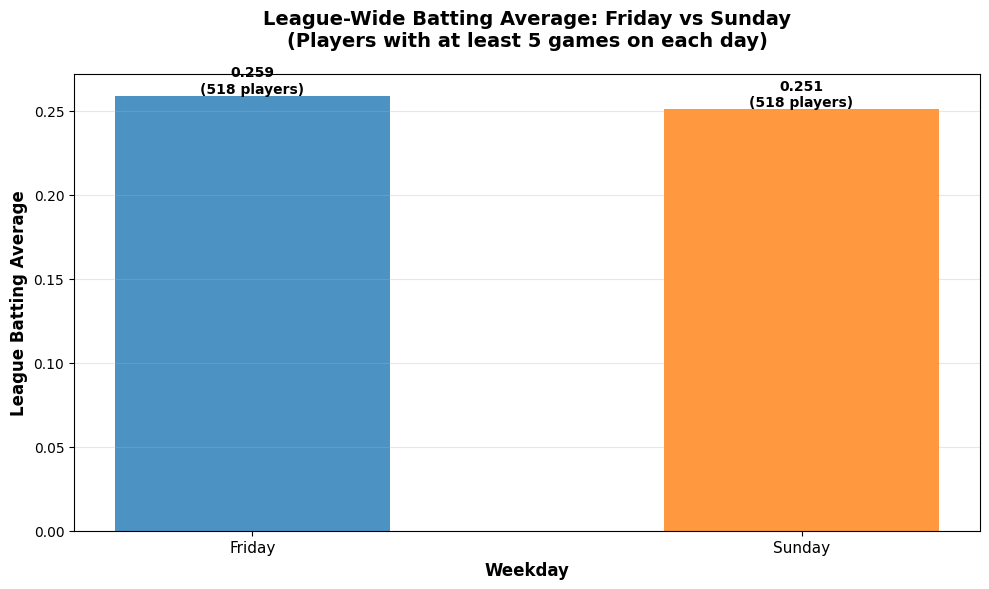

In [2]:
import matplotlib.pyplot as plt

# ============ CREATE FRIDAY VS SUNDAY LEAGUE AVG COMPARISON GRAPH ============

# Get league-wide averages for Friday and Sunday (players with at least 5 games)
league_stats_df = season2025DB.get_league_average_by_weekday(min_games=5, weekdays=["Friday", "Sunday"])

# Create the bar graph
fig, ax = plt.subplots(figsize=(10, 6))

weekdays = league_stats_df['weekday'].values
avg_values = league_stats_df['AVG'].values
num_players = league_stats_df['num_players'].values

x = range(len(weekdays))
width = 0.5

bars = ax.bar(x, avg_values, width, color=['#1f77b4', '#ff7f0e'], alpha=0.8)

# Customize the plot
ax.set_xlabel('Weekday', fontsize=12, fontweight='bold')
ax.set_ylabel('League Batting Average', fontsize=12, fontweight='bold')
ax.set_title('League-Wide Batting Average: Friday vs Sunday\n(Players with at least 5 games on each day)',
             fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(weekdays, fontsize=11)
ax.grid(axis='y', alpha=0.3)

# Add value labels on bars with player count
for i, (bar, num) in enumerate(zip(bars, num_players)):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
           f'{height:.3f}\n({int(num)} players)',
           ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('files/friday_sunday_league_avg_comparison.png', dpi=300, bbox_inches='tight')
print("\nGraph saved to files/friday_sunday_league_avg_comparison.png")
print(f"\nLeague Stats:\n{league_stats_df}")
plt.show()


In [3]:
###TO DO: Whatever you want, after the top is done obviously